In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
# change to your file
data = pd.read_csv("sf_clean.csv")

df = pd.DataFrame(data)
df

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7.0
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7.0
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7.0
...,...,...,...,...,...,...,...,...,...
984,3595,1200.0,2.0,1.0,(b) on-site,(c) cats,(c) multi,(d) no parking,9.0
985,4695,1700.0,3.0,2.0,(a) in-unit,(d) no pets,(c) multi,(d) no parking,7.0
986,1950,450.0,1.0,1.0,(c) no laundry,(d) no pets,(a) single,(c) off-street,3.0
987,3600,1100.0,3.0,1.0,(a) in-unit,(d) no pets,(c) multi,(d) no parking,8.0


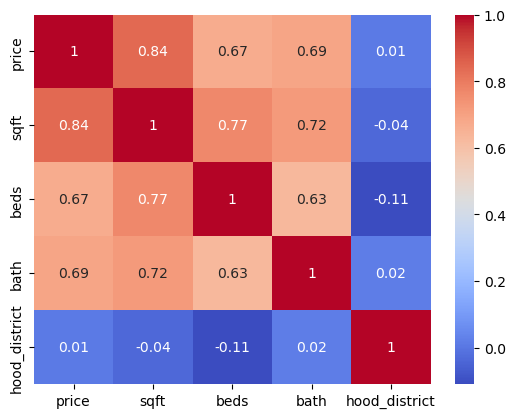

In [36]:
# makes a heatmap of correlations between variables 
# the closer to 1 or -1, the higher the correlation
matrix = df.corr().round(2)
matrix
sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.show()

In [37]:
# find variables with highest correlation above and change x and y to match that data
x = df["sqft"].values.reshape(-1, 1)
y = df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

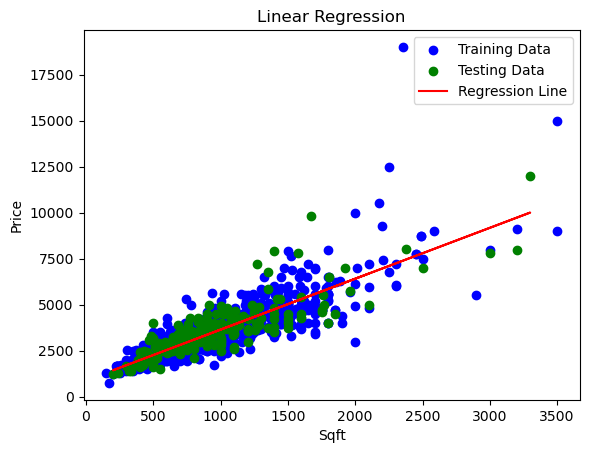

In [38]:
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Testing Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')

# change xlabel, ylabel to match your variables
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [45]:
m = model.coef_[0]
b = model.intercept_

equation = f"y = {m}x + {b}"
equation

'y = 2.7638639799995635x + 882.3803481922846'

In [ ]:
'''
use R-squared, MSE, MAE to determine how good the model actually was at predicting test data
some info are on each of the cells, I suggest googling why these are good too
'''

In [42]:
'''
R-squared
measures the proportion of the variance in the dependent variable
that can be explained by the independent variable
ranges -1 to 1
closer to -1 or 1 means better fit, closer to 0 is worse fit
'''
r2_score(y_test, y_pred)

0.697779516218001

In [43]:
'''
measures average squared difference between predicted and actual values
gives more weight to larger errors
closer to 0 is better fit
'''
mean_squared_error(y_test, y_pred)

662751.8842595347

In [44]:
'''
measures average absolute difference between predicted and actual values
is less sensitive to outliers compared to MSE
closer to 0 is better fit
'''
mean_absolute_error(y_test, y_pred)

572.8669134986693